# Mango Fruit Disease detection model

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from tensorflow.keras import layers

In [2]:
print(tf.__version__)

2.14.0


## create a dataset

In [3]:
# create a dataset

batch_size=32
img_height=180
img_width=180

path_train = "Data set/test"
train_image_dataset = tf.keras.utils.image_dataset_from_directory(
    path_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    validation_split=0.2,
    subset="training",
    seed=123,
)

path_validate = "Data set/train"
validate_image_dataset = tf.keras.utils.image_dataset_from_directory(
    path_validate,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    validation_split=0.2,
    subset="validation",
    seed=123,
    
)

class_names = train_image_dataset.class_names
class_name = {}
for i in range(len(class_names)):
    class_name[i + 1] = class_names[i]

print(class_names)
print(class_name)

Found 605 files belonging to 3 classes.
Using 484 files for training.
Found 2895 files belonging to 3 classes.
Using 579 files for validation.
['healthy', 'rot', 'rust']
{1: 'healthy', 2: 'rot', 3: 'rust'}


##  Visualize the data

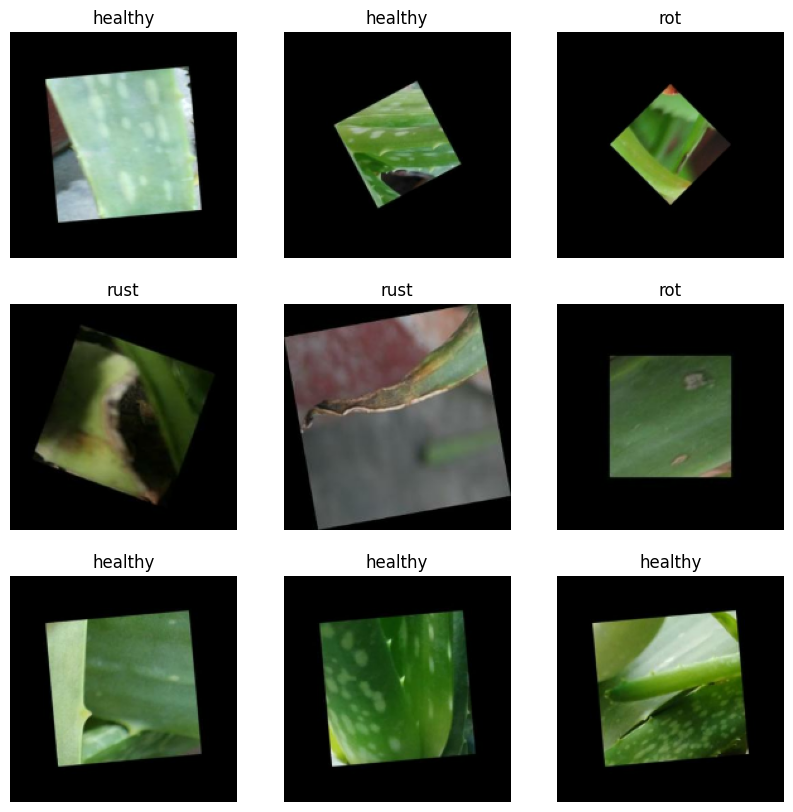

In [4]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
count = 0  # Initialize a count to keep track of how many images have been plotted

for images, labels in train_image_dataset:
    for i in range(len(images)):  # Iterate over all available images in the batch
        if count >= 9:
            break  # Exit the loop if you've plotted 9 images
        ax = plt.subplot(3, 3, count + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        count += 1
    if count >= 9:
        break  # Exit the outer loop if you've plotted 9 images

plt.show()


In [5]:
for image_batch , labels_batch in train_image_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


##  creating CNN model

In [6]:
# creating model

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

##  compile the model

In [7]:
# compile the model

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

##  Train the model

In [9]:
# Train teh model

epochs=30
history = model.fit(
    train_image_dataset,
    validation_data=validate_image_dataset,
    epochs=epochs
)

Epoch 1/30
16/16 [==============================] - 20s 1s/step - loss: 0.4224 - accuracy: 0.8388 - val_loss: 2.1619 - val_accuracy: 0.5164
Epoch 2/30
16/16 [==============================] - 19s 1s/step - loss: 0.1154 - accuracy: 0.9752 - val_loss: 1.8793 - val_accuracy: 0.5389
Epoch 3/30
16/16 [==============================] - 15s 951ms/step - loss: 0.0513 - accuracy: 0.9917 - val_loss: 2.7521 - val_accuracy: 0.5734
Epoch 4/30
16/16 [==============================] - 16s 987ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 3.7335 - val_accuracy: 0.5527
Epoch 5/30
16/16 [==============================] - 15s 950ms/step - loss: 0.0430 - accuracy: 0.9897 - val_loss: 2.9340 - val_accuracy: 0.5786
Epoch 6/30
16/16 [==============================] - 15s 956ms/step - loss: 0.0115 - accuracy: 0.9979 - val_loss: 3.7978 - val_accuracy: 0.5440
Epoch 7/30
16/16 [==============================] - 16s 973ms/step - loss: 0.0285 - accuracy: 0.9917 - val_loss: 3.3814 - val_accuracy: 0.5561
Epoch

##  Predict the new data

In [ ]:
path = "Data set/train/healthy_leaf/h1 (103).jpg"

img = imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
# predict the output

# path = "Cat_Dog/test/cats/cat_1.jpg"

img = image.load_img(path,target_size=(img_height,img_width))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
# img = preprocess_input(img)



prediction = model.predict(img)

predicted_class = np.argmax(prediction)

print(f"Predicted class : {predicted_class}")
print(f"Predict animal : {class_names[predicted_class]}")

In [ ]:
# Define the path where you want to save the model

model.save('CNN_Model.h5')


In [ ]:
df = pd.read_csv("data_description.csv")
# df = df.replace('',np.nan)
# df = df.dropna(axis="rows",how="all")
# df =  df.fillna(0)
df

In [ ]:
print(df.info())

# df = df.dropna()  # Drop rows with missing values



In [ ]:
# Assuming 'predicted_class' is the index
Disease	,Description	,Symptoms	,Diagnosis	,Precaution	,Medicine_for_cure	,Stage	,Severity,	Recommended_treatment	,Remedy_to_cure	 = df.loc[predicted_class, :]

print(Disease)
# Print the values
print(f"Disease Type : {Disease}\nSeverity : {Severity}\nDescription : {Description}\nSymptoms : {Symptoms}\nDiagnosis : {Diagnosis}\nPrecautions : {Precaution}")
# Disease,Description,Symptoms,Diagnosis,Precaution,Medicine_for_cure,Stage,Severity,Recommended_treatment,Remedy_to_cure = df.loc[predicted_class, :]